## BirdsEye results user guide

By default, experiment logs will be stored in the `./runs` directory. 

Depending on the motion planning method used, the logs will be separated into subdirectories `./runs/mcts` and `./runs/dqn`

Every experiment will have 2 log files associated with it.  
They are saved in the format `%Y-%m-%dT%H:%M:%S_header.txt` and `%Y-%m-%dT%H:%M:%S_data.csv` where `%Y-%m-%dT%H:%M:%S` is a timestamp denoting when the experiment was started.

The `%Y-%m-%dT%H:%M:%S_header.txt` files contain a dictionary of the settings used to run the experiment. 

The `%Y-%m-%dT%H:%M:%S_data.csv` files contain a table of metrics, and state information saved from the experiment.

In [35]:
import matplotlib.pyplot as plt
import pprint
from birdseye.results import * 

To easily view the results from specific experiments we have written the `filter_runs(method, filter)` function, which accepts a a motion planning method and a dictionary.  
The dictionary is used to filter experiments by specific config settings.  
For instance you can filter by `datetime_start`, `datetime_end`, `reward`, `sensor` and others.

The `filter_runs()` function will return a list of experiment names (starting timestamp) which can then be used to access the specific experiment config (using `get_config(method, run)`) and log data (using `get_data(method, run)`).

In [40]:
run_filter = {'datetime_start': '2021-06-18T00:00:00', 'reward':r, 'sensor':s, 'target_start': 78, 'target_speed':1 }
runs = filter_runs('mcts', run_filter)
config = get_config('mcts', runs[0])
data = get_data('mcts', runs[0])

print('Run: {}'.format(runs[0]))
print('\nConfig: ')
pprint.pprint(config)
print('\nLog metrics and state information:')
pprint.pprint(list(data.columns.values))


Run: 2021-06-24T05:06:28

Config: 
{'Defaults': {'collision': '-2.',
              'depth': '10',
              'iterations': '150',
              'lambda_arg': '0.8',
              'loss': '-2.',
              'plotting': 'False',
              'simulations': '200',
              'trials': '500'},
 'Methods': {'action': 'simpleactions',
             'collision': '-2.0',
             'depth': '10',
             'iterations': '500',
             'lambda_arg': '0.8',
             'loss': '-2.0',
             'method': 'mcts',
             'plotting': 'False',
             'resample_proportion': '0.005',
             'reward': 'entropy_collision_reward',
             'sensor': 'signalstrength',
             'simulations': '500',
             'state': 'rfstate',
             'target_speed': '1',
             'target_start': '78',
             'trials': '100'}}

Log metrics and state information:
['Unnamed: 0',
 'time',
 'run_time',
 'target_state',
 'sensor_state',
 'action',
 'observation

## Plotting
For convenience we have written a set of plotting functions which plot various metrics in various formats.  
See `birdseye/results.py` for more details on the plotting functions.

## Comparison of MCTS and DQN action policies for various sensor models and reward functions
### Figure 4 from IEEE ROSE 21 paper

Bearings Sensor & State Dependent Reward
MCTS inference time=7.99e-02s
DQN inference time=7.04e-04s
Speedup (MCTS/DQN) = 113.57x
Bearings Sensor & Belief Dependent Reward
MCTS inference time=3.73e+00s
DQN inference time=7.19e-04s
Speedup (MCTS/DQN) = 5190.98x
Signal Strength Sensor & State Dependent Reward
MCTS inference time=7.18e-02s
DQN inference time=7.18e-04s
Speedup (MCTS/DQN) = 100.09x
Signal Strength Sensor & Belief Dependent Reward
MCTS inference time=2.22e+00s
DQN inference time=6.69e-04s
Speedup (MCTS/DQN) = 3319.62x


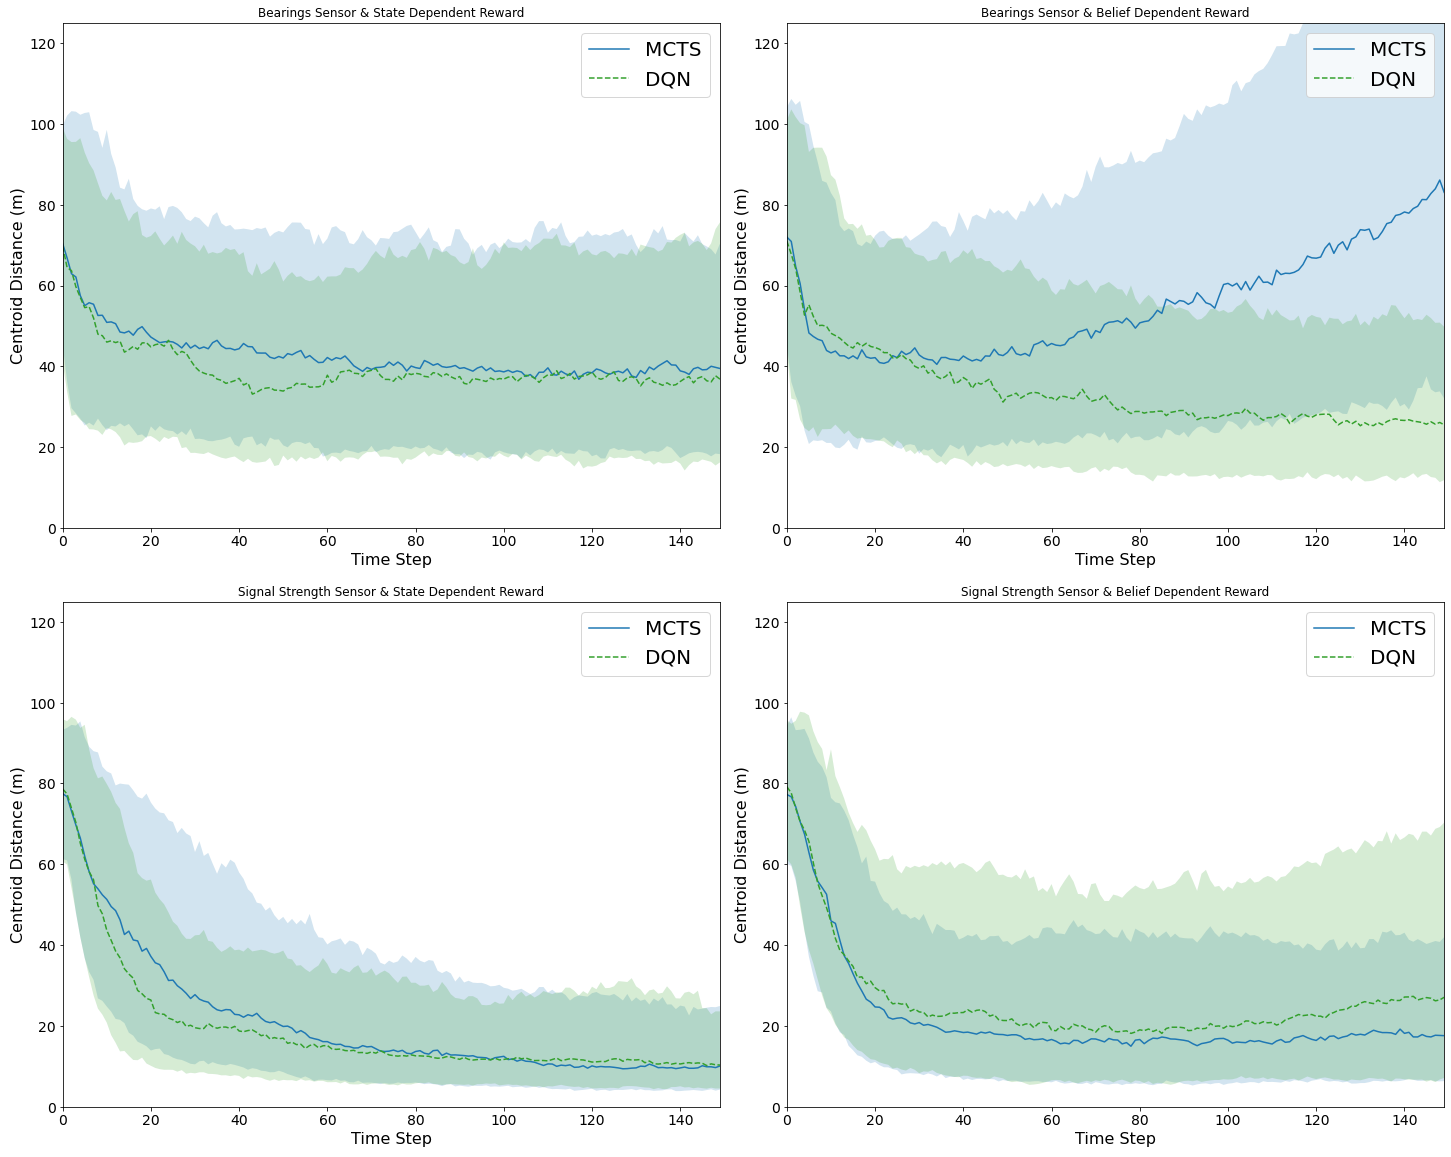

In [9]:
plotter(single_metric_grid, variance_bars=True )

## Localization performance with varying starting positions
### figure 5 from IEEE ROSE 21 paper

Bearings Sensor & State Dependent Reward


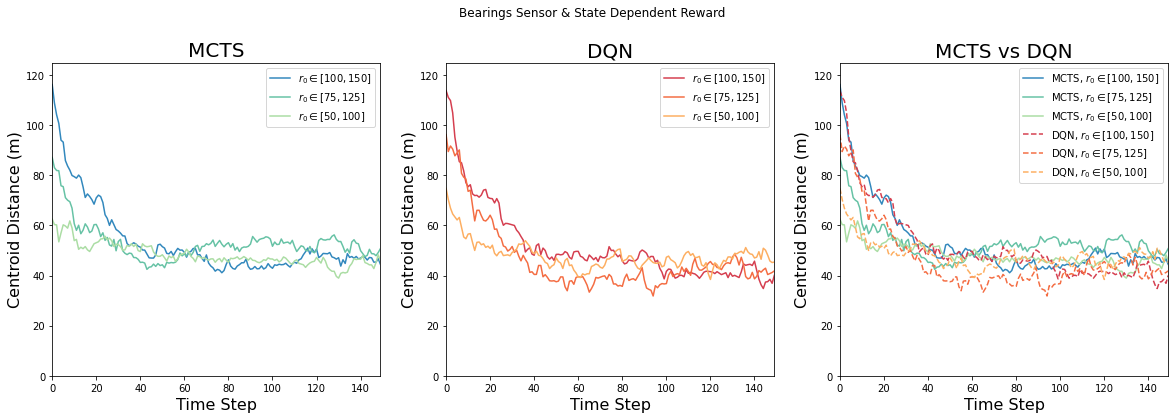

Bearings Sensor & Belief Dependent Reward


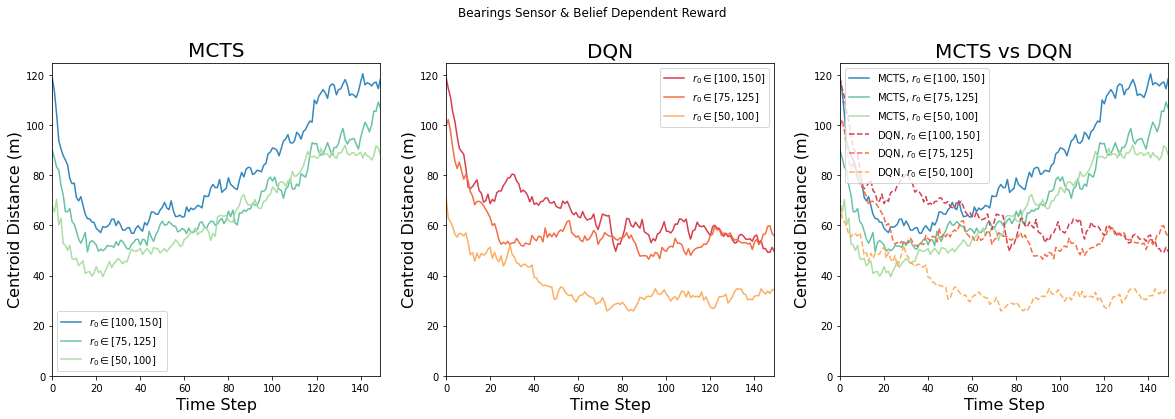

Signal Strength Sensor & State Dependent Reward


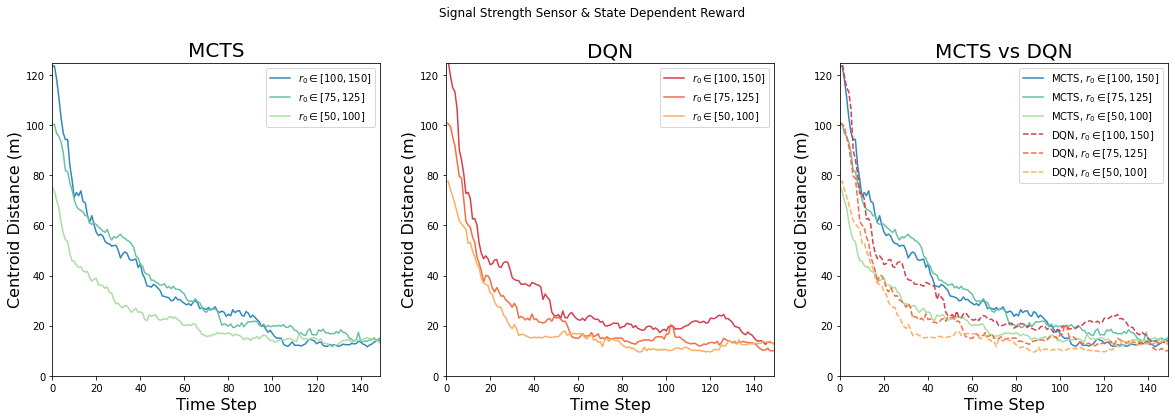

Signal Strength Sensor & Belief Dependent Reward


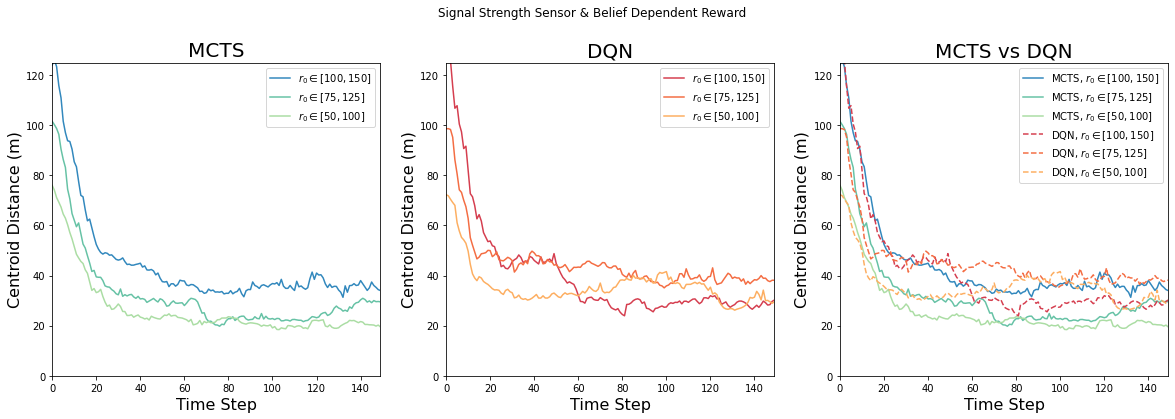

In [3]:
# figure 5
sensors = ['drone', 'signalstrength']
rewards = ['range_reward', 'entropy_collision_reward']

for s in sensors: 
    for r in rewards: 
        config = {'datetime_start': '2021-06-19T00:00:00', 'reward':r, 'sensor':s,  'target_speed':1, 'target_start':['75','100', '125']}
        starting_position_plots(config, limit=3)

## Comparison of range, r, and bearing, θ, errors
### figure 6 from IEEE ROSE 21 paper

Bearings Sensor & State Dependent Reward
MCTS inference time=7.99e-02s
DQN inference time=7.04e-04s
Speedup (MCTS/DQN) = 113.57x
Bearings Sensor & Belief Dependent Reward
MCTS inference time=3.73e+00s
DQN inference time=7.19e-04s
Speedup (MCTS/DQN) = 5190.98x
Signal Strength Sensor & State Dependent Reward
MCTS inference time=7.18e-02s
DQN inference time=7.18e-04s
Speedup (MCTS/DQN) = 100.09x
Signal Strength Sensor & Belief Dependent Reward
MCTS inference time=2.22e+00s
DQN inference time=6.69e-04s
Speedup (MCTS/DQN) = 3319.62x


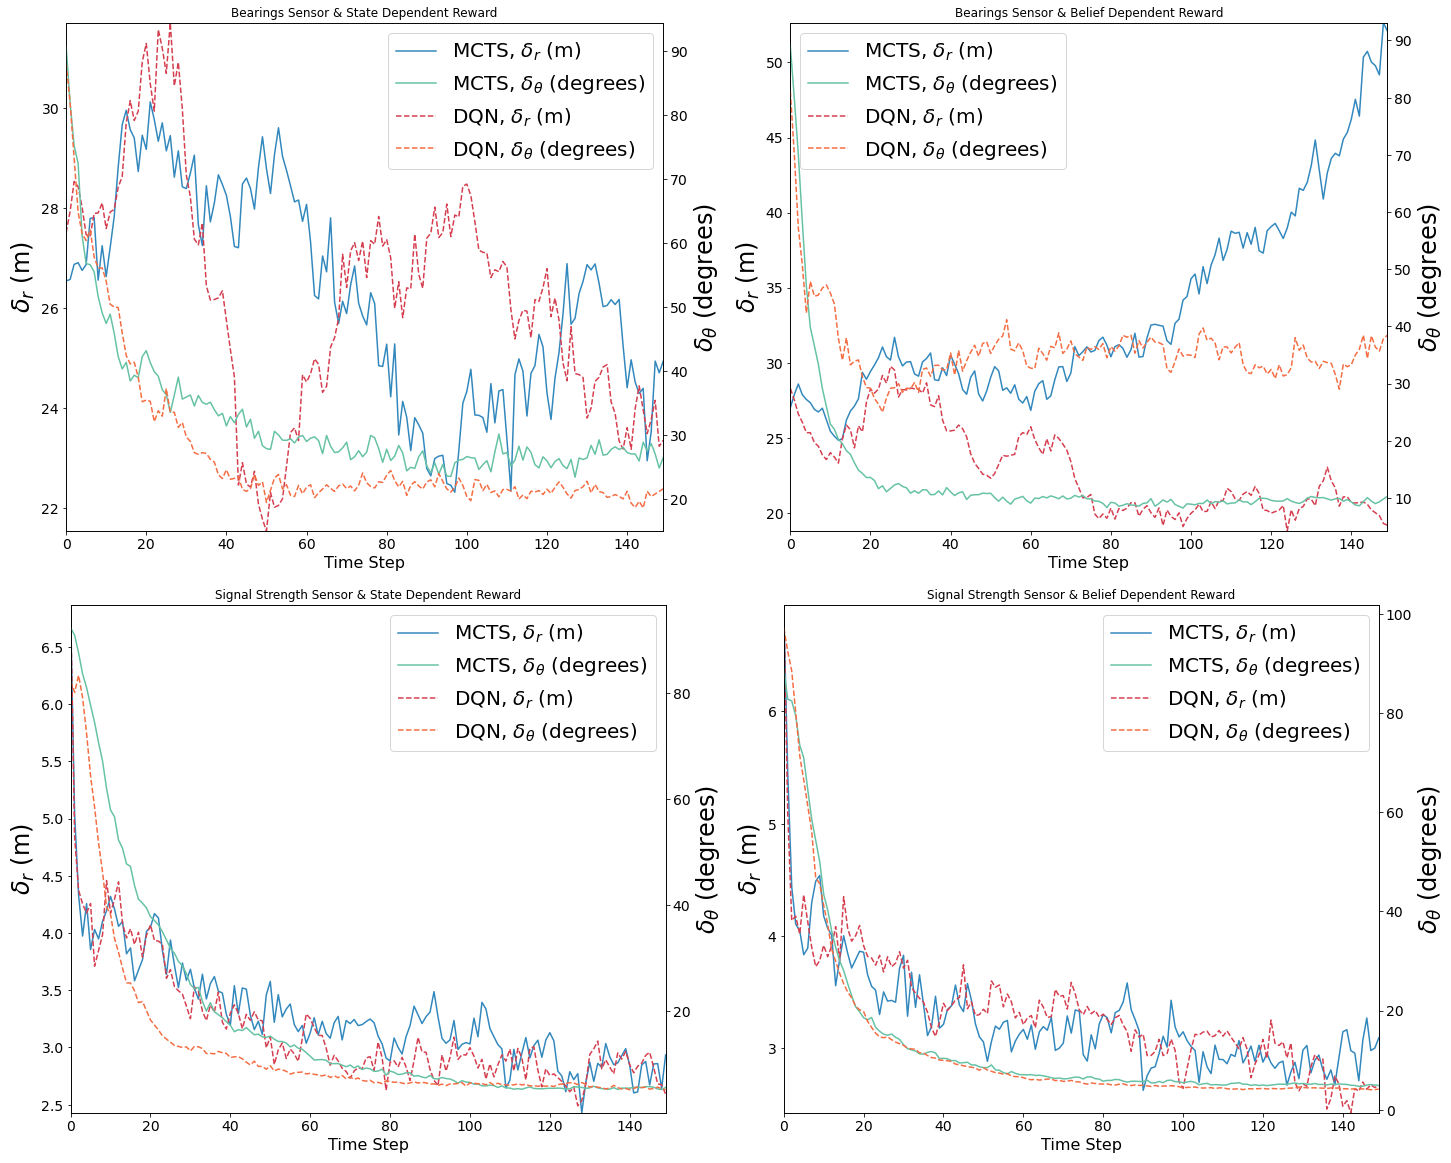

In [4]:
plotter(two_metric_grid, metric1='r_err', metric2='theta_err', limit=2, variance_bars=False)

## Comparison of the belief range and bearing uncertainty (standard deviation) 
### figure 7 from IEEE ROSE 21 paper

Bearings Sensor & State Dependent Reward
MCTS inference time=7.99e-02s
DQN inference time=7.04e-04s
Speedup (MCTS/DQN) = 113.57x
Bearings Sensor & Belief Dependent Reward
MCTS inference time=3.73e+00s
DQN inference time=7.19e-04s
Speedup (MCTS/DQN) = 5190.98x
Signal Strength Sensor & State Dependent Reward
MCTS inference time=7.18e-02s
DQN inference time=7.18e-04s
Speedup (MCTS/DQN) = 100.09x
Signal Strength Sensor & Belief Dependent Reward
MCTS inference time=2.22e+00s
DQN inference time=6.69e-04s
Speedup (MCTS/DQN) = 3319.62x


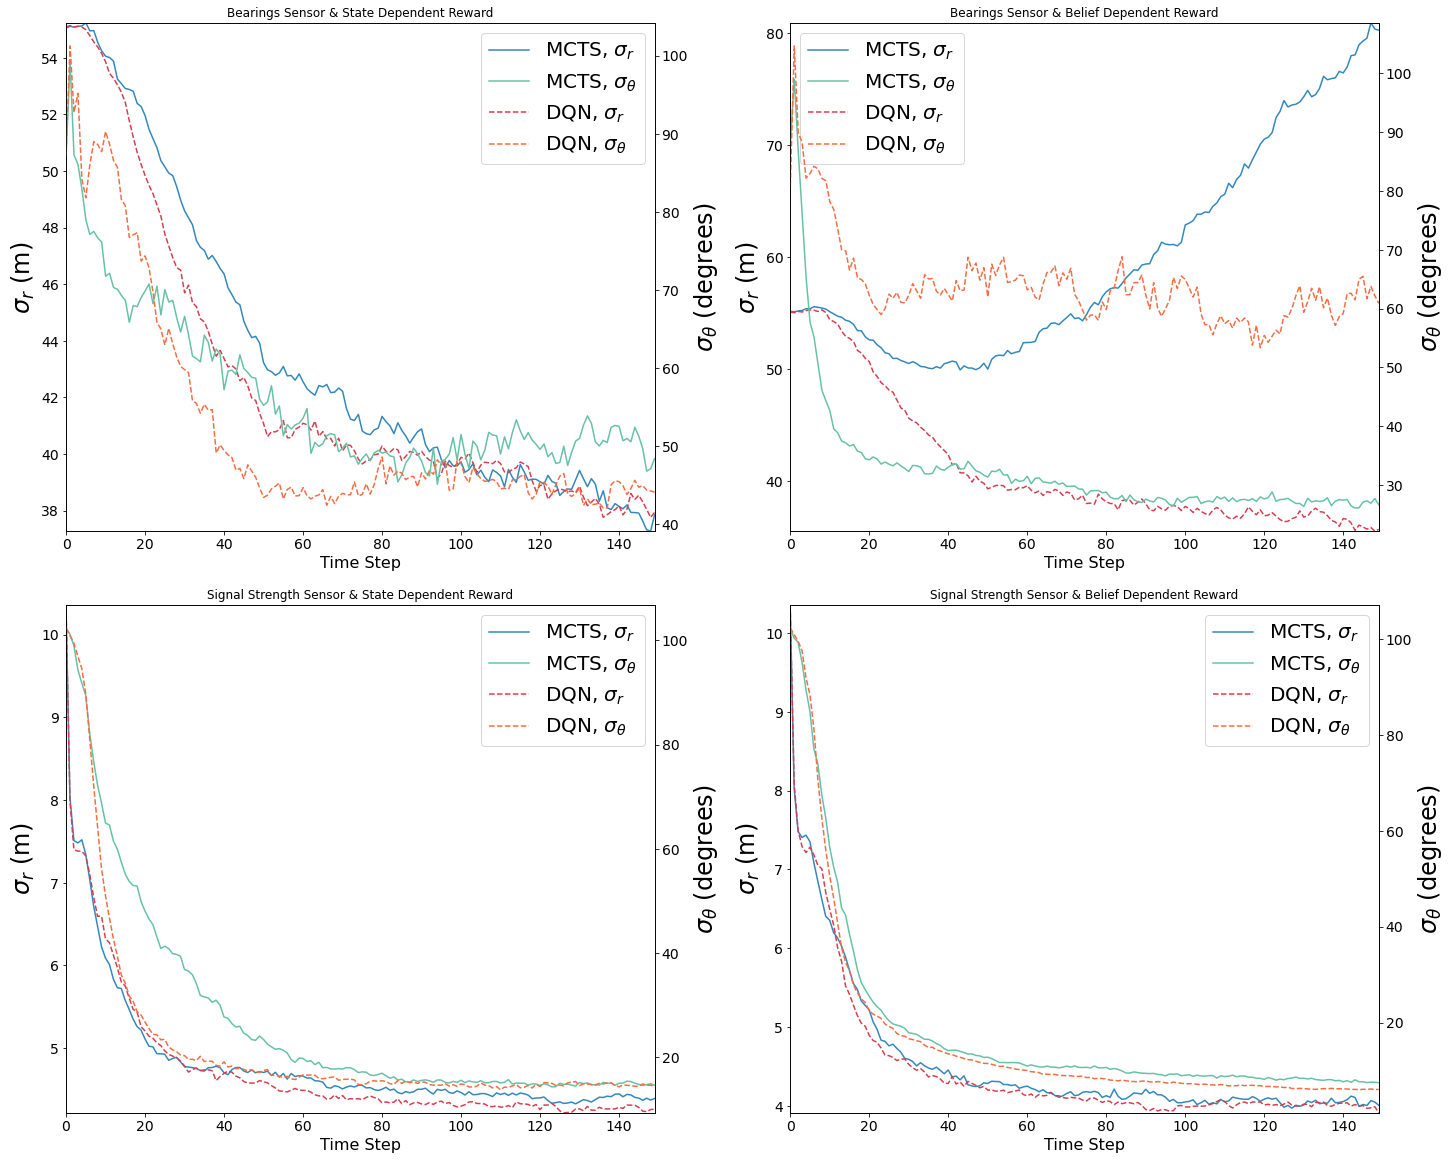

In [5]:
plotter(std_dev_grid, variance_bars=False, y_lim=10, limit=2)

### alternative view of figure 6

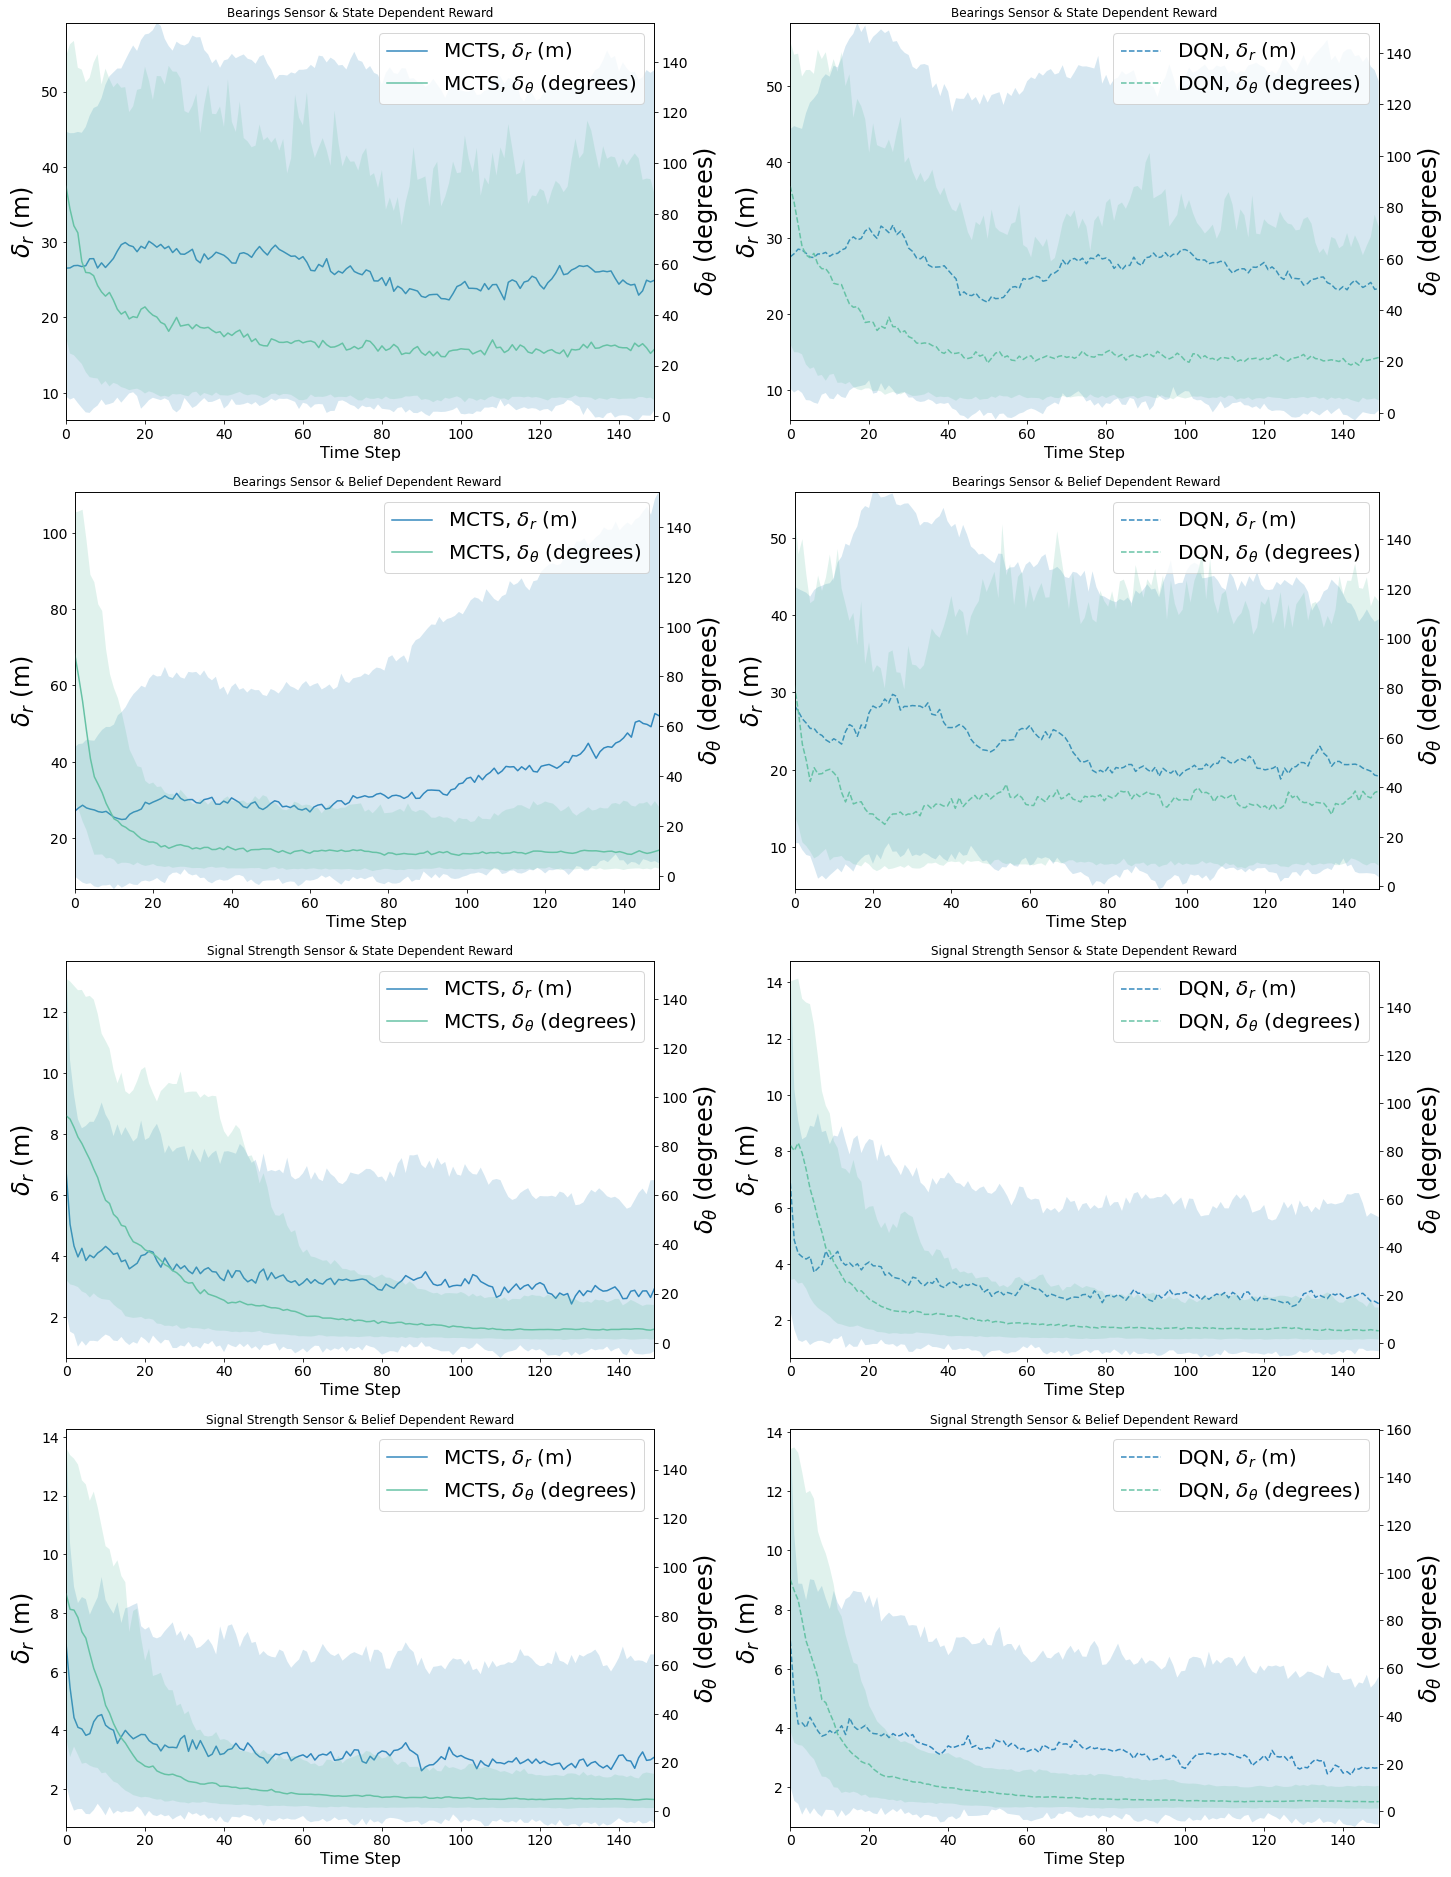

In [18]:
separate_plotter(two_metric_grid ,metric1='r_err', metric2='theta_err', timing=False, variance_bars=True, limit=2)

### alternative view of figure 7

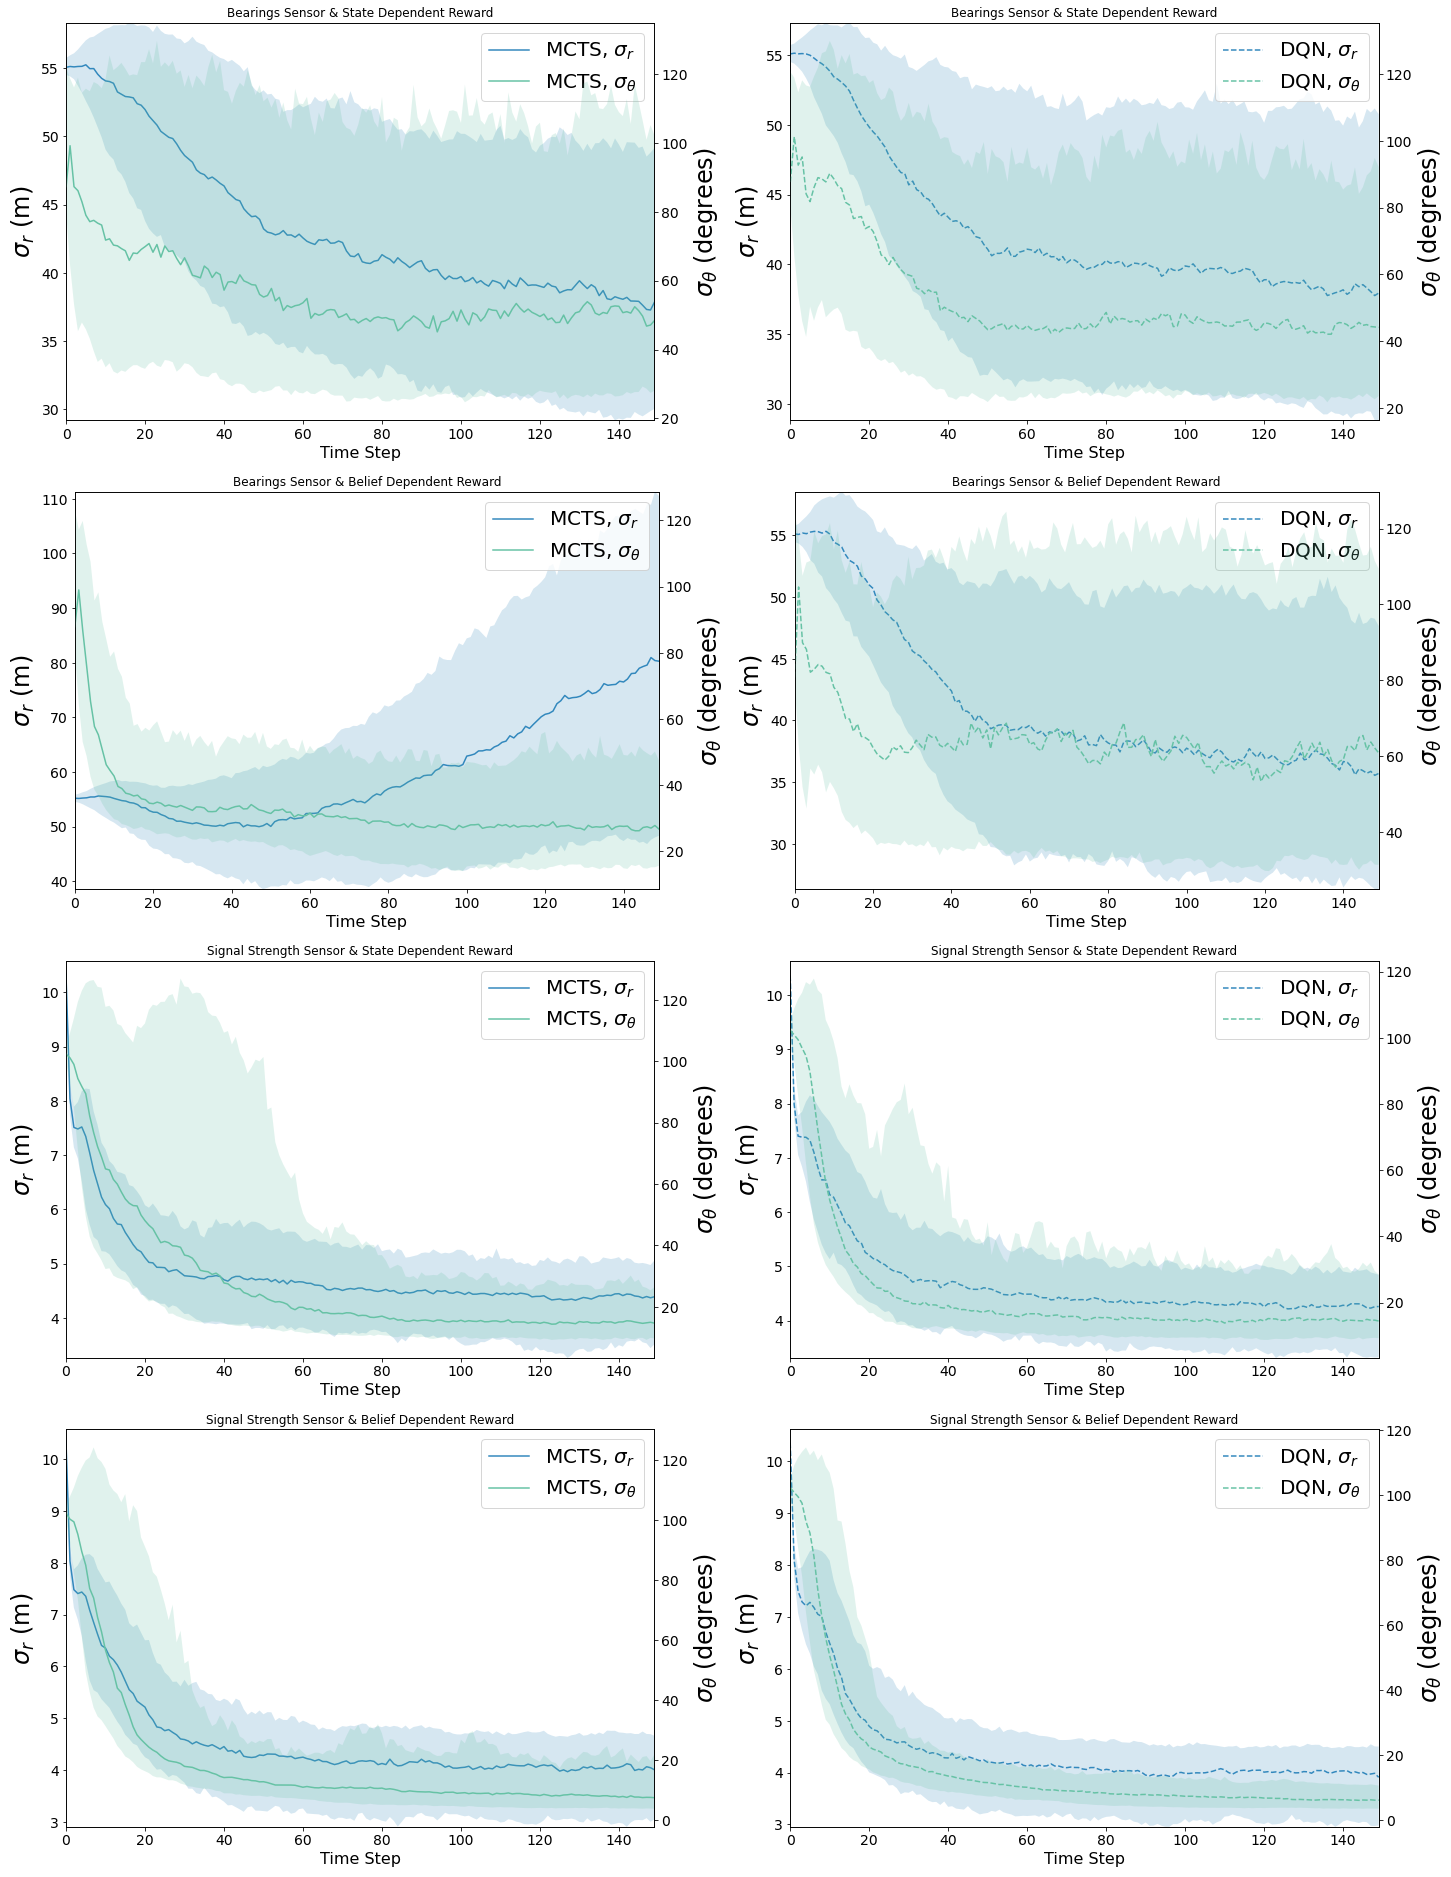

In [19]:
separate_plotter(std_dev_grid, variance_bars=True, timing=False, y_lim=10, limit=2)